In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv('data.csv', encoding='unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Checking Data types of all columns

In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.dropna(subset=['CustomerID'],axis = 0, inplace=True)

In [9]:
df.shape

(406829, 8)

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### Data Formatting

In [12]:
df['Date'] = pd.to_datetime(df['InvoiceDate'])
df['Month-Year'] = df['Date'].dt.strftime('%b-%Y')
df.drop(['InvoiceDate','Date'],axis=1,inplace=True)

In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Dec-2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Dec-2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Dec-2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,Dec-2011


In [14]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64

In [15]:
columns=["Description", "Quantity", "UnitPrice" ]

### Anlaytics of items

In [16]:
df_max = df[df['Description'] == "WHITE HANGING HEART T-LIGHT HOLDER"][columns]
df_max

,Description,Quantity,UnitPrice
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
49,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
66,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
220,WHITE HANGING HEART T-LIGHT HOLDER,64,2.55
262,WHITE HANGING HEART T-LIGHT HOLDER,32,2.55
...,...,...,...
537291,WHITE HANGING HEART T-LIGHT HOLDER,1,2.95
537326,WHITE HANGING HEART T-LIGHT HOLDER,2,2.95
537852,WHITE HANGING HEART T-LIGHT HOLDER,6,2.95
539979,WHITE HANGING HEART T-LIGHT HOLDER,32,2.55


In [17]:
#check quantity of all different items
df_quan = df.groupby('Description')['Quantity'].sum().reset_index()
df_quan.columns = ['Description', 'Total Quantity']
df_quan

,Description,Total Quantity
0,4 PURPLE FLOCK DINNER CANDLES,140
1,50'S CHRISTMAS GIFT BAG LARGE,1883
2,DOLLY GIRL BEAKER,2391
3,I LOVE LONDON MINI BACKPACK,360
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
3891,ZINC T-LIGHT HOLDER STARS SMALL,4850
3892,ZINC TOP 2 DOOR WOODEN SHELF,5
3893,ZINC WILLIE WINKIE CANDLE STICK,2595
3894,ZINC WIRE KITCHEN ORGANISER,25


In [18]:
df_quan_top12 = df_quan.nlargest(12, 'Total Quantity')
df_quan_top12

,Description,Total Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409
2612,POPCORN HOLDER,30504
2669,RABBIT NIGHT LIGHT,27094
2057,MINI PAINT SET VINTAGE,25880
2245,PACK OF 12 LONDON TISSUES,25321
2277,PACK OF 60 PINK PAISLEY CAKE CASES,24163


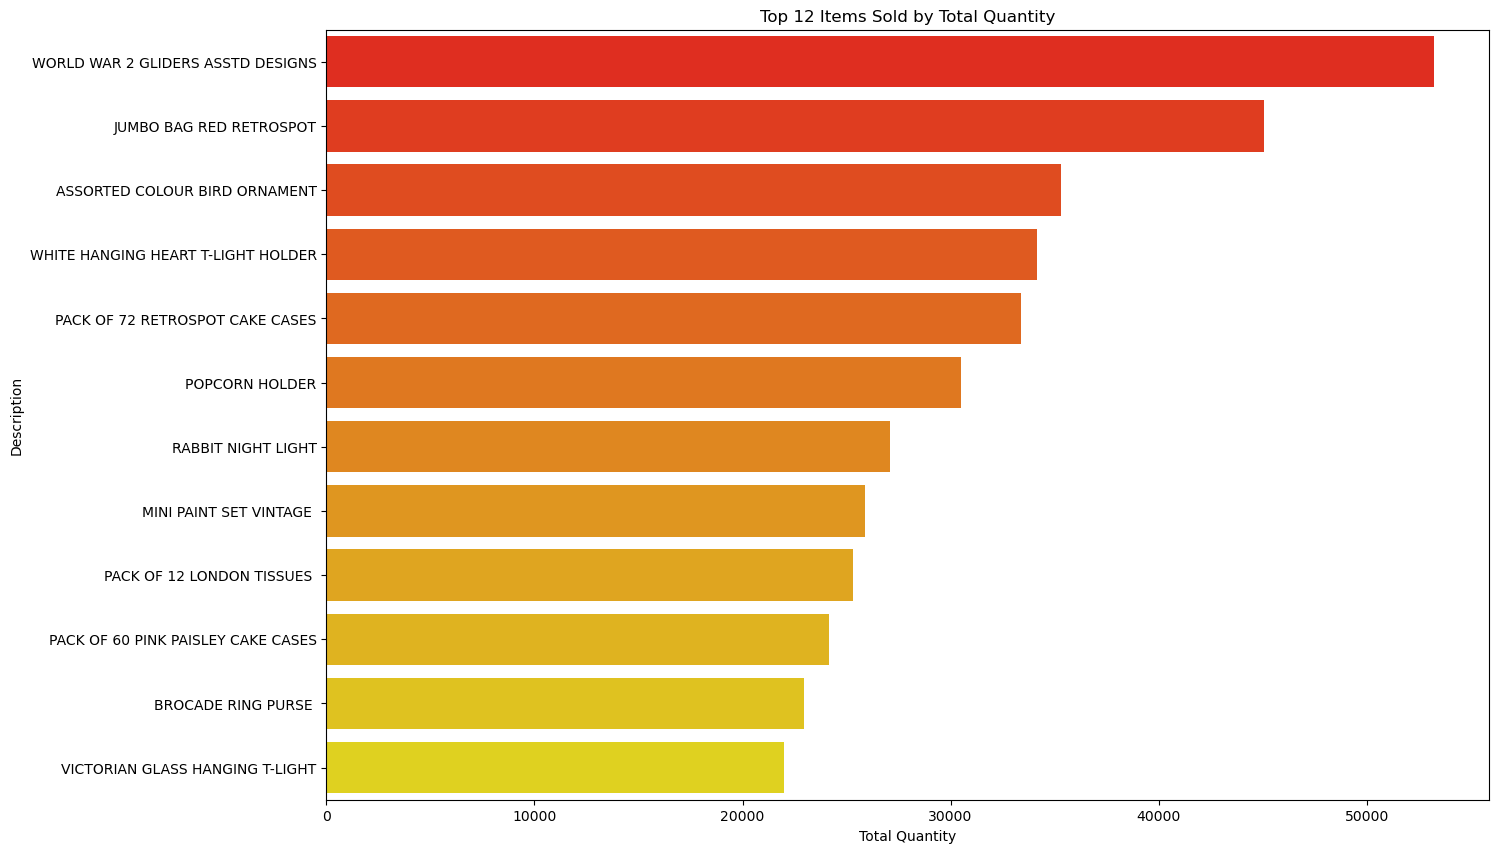

In [19]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_quan_top12, x="Total Quantity", y="Description", capsize=3, palette="autumn")
plt.title("Top 12 Items Sold by Total Quantity")
plt.xlabel("Total Quantity")
plt.ylabel("Description")
plt.show()

In [20]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Dec-2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Dec-2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Dec-2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,Dec-2011


In [21]:
df['Total Price'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010,20.34


### Constructing Heat Map

C:\Users\vaibh\AppData\Local\Temp\ipykernel_2820\570770136.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="Greens",annot=True,fmt=".2f")


<Axes: >

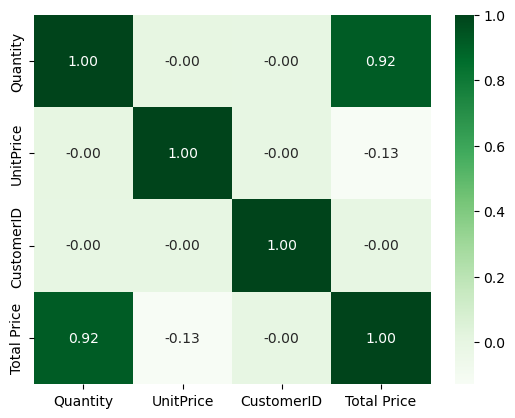

In [22]:
sns.heatmap(df.corr(),cmap="Greens",annot=True,fmt=".2f")

#### From heatmap analysis, we can see that Total Price is in high correlation with Quantity (more over Total Price has been manipulated over quantity) only

In [23]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Dec-2011,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Dec-2011,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Dec-2011,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,Dec-2011,16.60


#### encoding is perfomed on the non-numerical columns, which may be necessary for the price recommendation.

In [24]:
label_en = LabelEncoder()
df['StockCode_Encode'] = label_en.fit_transform(df['StockCode'])
df['Invoice_Encode'] = label_en.fit_transform(df['InvoiceNo'])

In [25]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year,Total Price,StockCode_Encode,Invoice_Encode
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010,15.30,3249,0
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010,20.34,2649,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010,22.00,2855,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010,20.34,2803,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010,20.34,2802,0
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Dec-2011,10.20,1470,18535
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Dec-2011,12.60,1746,18535
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Dec-2011,16.60,2086,18535
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,Dec-2011,16.60,2087,18535


In [26]:
# seperating dataset for Regression Analysis

In [27]:
X = df.drop(columns=['InvoiceNo','StockCode','Total Price','Month-Year','Description','CustomerID','Country'])
y = df['Total Price']

In [28]:
X

,Quantity,UnitPrice,StockCode_Encode,Invoice_Encode
0,6,2.55,3249,0
1,6,3.39,2649,0
2,8,2.75,2855,0
3,6,3.39,2803,0
4,6,3.39,2802,0
...,...,...,...,...
541904,12,0.85,1470,18535
541905,6,2.10,1746,18535
541906,4,4.15,2086,18535
541907,4,4.15,2087,18535


In [29]:
X.dtypes

Quantity              int64
UnitPrice           float64
StockCode_Encode      int32
Invoice_Encode        int32
dtype: object

In [30]:
y

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Total Price, Length: 406829, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
# Standardization to reduce the differ of various input features

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[-0.03636296, -0.00707983, -0.45122233,  0.92579004],
       [-0.03996953, -0.00707983, -0.68693822,  0.62134974],
       [-0.03996953, -0.04072785, -0.21550644,  0.62098967],
       ...,
       [-0.03636296, -0.03766894,  0.22749729, -0.62431701],
       [-0.03636296, -0.01865049, -0.81012642, -0.4793883 ],
       [-0.03636296, -0.0183845 , -0.82670945, -0.72189634]])

## Model Analysis

In [35]:
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    Lasso(alpha = 10),
    Ridge(alpha = 10)
]

In [36]:
for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    
    r2_value = r2_score(y_test,y_pred)
    print(f"{m.__class__.__name__} R2 Score: {r2_value}")

LinearRegression R2 Score: -0.07562386632357465
RandomForestRegressor R2 Score: 0.6058144453564233
Lasso R2 Score: 0.013488869789706093
Ridge R2 Score: -0.07559547874548178


#### Random Forest Regressor overall gives the best R2 Score out of the models evaluated. The R2 value of Random Forest Regressor is more closer to 1, than others. RF Regressor is able to understand and generalize the unseen (test) data well. It also has the ability to understand the non linear relationships in data points.

In [37]:
# Analysis for Lasso Model, which is second best in this scenario

In [38]:
r2_lasso = []

In [39]:
for x in range(10,500,10):
    model_l = Lasso(alpha = x)
    model_l.fit(X_train, y_train)
    y_pred = model_l.predict(X_test)

    r2_value = r2_score(y_test,y_pred)
    r2_lasso.append(r2_value)

In [40]:
r2_lasso

[0.013488869789706093,
 0.0955045672250584,
 0.16896904291995318,
 0.23388229693001317,
 0.2902443292214839,
 0.33805513979436763,
 0.36401984528496467,
 0.36665930251864176,
 0.36859644778417455,
 0.36983128108156305,
 0.37036380241080724,
 0.37019401177190703,
 0.3693219091648626,
 0.3677474945896738,
 0.3654707680463407,
 0.3624917295348632,
 0.3588103790552416,
 0.3544267166074756,
 0.3493407421915651,
 0.3435524558075105,
 0.33706185745531136,
 0.32986894713496817,
 0.32197372484648046,
 0.31337619058984856,
 0.30407634436507236,
 0.29407418617215175,
 0.28336971601108696,
 0.27196293388187753,
 0.25985383978452403,
 0.24704243371902612,
 0.23352871568538414,
 0.21931268568359763,
 0.20439434371366672,
 0.18877368977559184,
 0.17245072386937244,
 0.15542544599500863,
 0.13769785615250063,
 0.11926795434184823,
 0.10013574056305152,
 0.08030121481611052,
 0.059764377101025445,
 0.03852522741779563,
 0.016583765766421732,
 -4.082751379641536e-06,
 -4.082751379641536e-06,
 -4.0827513

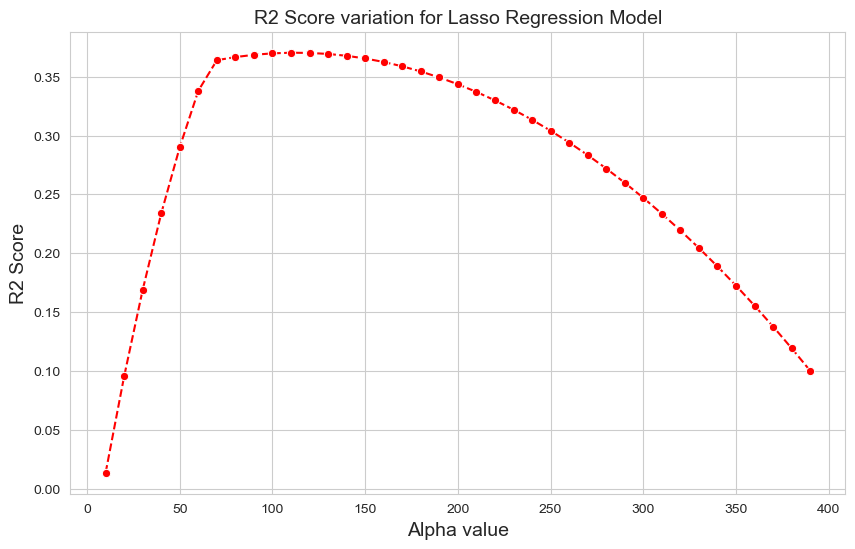

In [41]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(range(10,400,10)), y=r2_lasso[:39], marker='o', color='red', linestyle = 'dashed')
plt.title('R2 Score variation for Lasso Regression Model',fontsize=14)
plt.xlabel('Alpha value',fontsize=14)
plt.ylabel('R2 Score',fontsize=14)
plt.show()

##### The model gets the max R2 Score of 0.37 (app.) but decreases when alpha further increases

In [42]:
n_estim = list(range(20,80,10))

In [43]:
random_forest_R = []

In [44]:
for n in n_estim:
    rf_R = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_R.fit(X_train,y_train)
    y_pred_ = rf_R.predict(X_test)

    r2_value = r2_score(y_test,y_pred_)
    random_forest_R.append(r2_value)

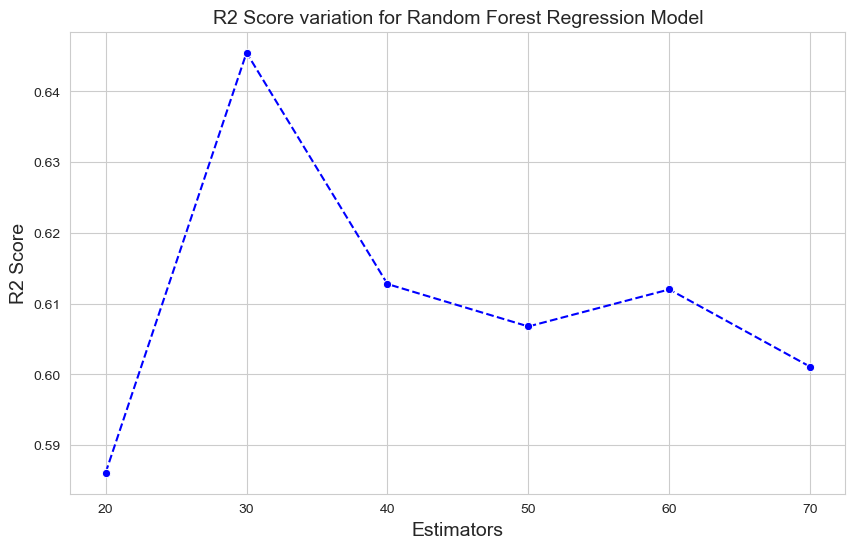

In [45]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=n_estim, y=random_forest_R, marker='o', color='blue', linestyle = 'dashed')
plt.title('R2 Score variation for Random Forest Regression Model',fontsize=14)
plt.xlabel('Estimators',fontsize=14)
plt.ylabel('R2 Score',fontsize=14)
plt.show()

In [46]:
random_forest_R

[0.5861008604193167,
 0.6454790289192889,
 0.6127783987787868,
 0.606778179857448,
 0.6120147102370131,
 0.6010820417573257]

In [47]:
max(random_forest_R)

0.6454790289192889

#### The model gets the max R2 Score of 0.645 (app.) There is fluctuation for the R2 Scores but the optimal number of trees in the RF is around 30.